In [1]:
# import sys
# !{sys.executable} -m pip install pandas

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
kill_df=pd.read_excel("killdump.xlsx",sheet_name="killdump",engine='openpyxl')

In [4]:
kill_df

,victimCorporationID,victimCorp,victimAlliance,victimCoaltion,finalCorporationID,finalCorp,finalAlliance,finalCoalition,destroyedShipTypeID,destroyedShipType,destroyedShipGroup,killTime,solarSystemID,solarSystemName,regionID,regionName,iskLost,iskDestroyed,bountyClaimed
0,98144067,SUPERFLUOUS WANDERLUST,The-Culture,NaN,98209290,5.11,The Afterlife.,NaN,22456,Sabre,Interdictor,2016-03-13 20:07:39,30004589,J5A-IX,10000058,Fountain,8.990583e+07,5.115281e+07,10230561.74
1,98089535,Traxxas Technologies,NaN,NaN,98209290,5.11,The Afterlife.,NaN,588,Reaper,Rookie ship,2016-03-20 06:26:37,30001446,Otsasai,10000016,Lonetrek,4.720000e+00,4.720000e+00,NaN
2,98089535,Traxxas Technologies,NaN,NaN,98209290,5.11,The Afterlife.,NaN,670,Capsule,Capsule,2016-03-20 06:27:42,30001446,Otsasai,10000016,Lonetrek,0.000000e+00,0.000000e+00,NaN
3,1000181,Federal Defense Union,NaN,NaN,98209290,5.11,The Afterlife.,NaN,16240,Catalyst,Destroyer,2016-04-02 20:46:10,30002759,Uuna,10000033,The Citadel,9.234775e+06,6.758139e+06,NaN
4,1000181,Federal Defense Union,NaN,NaN,98209290,5.11,The Afterlife.,NaN,670,Capsule,Capsule,2016-04-02 20:47:29,30002759,Uuna,10000033,The Citadel,0.000000e+00,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532017,1000006,Deep Core Mining Inc.,NaN,NaN,98443154,zz342,NaN,NaN,649,Tayra,Industrial,2016-03-19 18:19:24,30002761,Kassigainen,10000033,The Citadel,2.635970e+08,1.853535e+08,NaN
532018,1542130595,Epsilon Inc,NaN,NaN,98443154,zz342,NaN,NaN,657,Iteron Mark V,Industrial,2016-03-17 20:56:54,30002761,Kassigainen,10000033,The Citadel,4.687013e+08,1.566409e+08,NaN
532019,1000114,Garoun Investment Bank,NaN,NaN,98443154,zz342,NaN,NaN,649,Tayra,Industrial,2016-03-13 17:42:10,30000139,Urlen,10000002,The Forge,4.995808e+08,4.009468e+07,NaN
532020,98304485,The Chinese Bank Club Inc.,NaN,NaN,98443154,zz342,NaN,NaN,649,Tayra,Industrial,2016-03-15 21:17:15,30000139,Urlen,10000002,The Forge,1.944120e+08,1.929628e+08,NaN


In [5]:
#dropping IDs as they mean nothing in this context
#bounty also dropped as it's wholely dependent on someone else putting a bounty on the individual

kill_df.drop(['victimCorporationID','finalCorporationID','destroyedShipTypeID','solarSystemID','regionID','bountyClaimed'],axis=1,inplace=True)

In [6]:
kill_df.head()

,victimCorp,victimAlliance,victimCoaltion,finalCorp,finalAlliance,finalCoalition,destroyedShipType,destroyedShipGroup,killTime,solarSystemName,regionName,iskLost,iskDestroyed
0,SUPERFLUOUS WANDERLUST,The-Culture,NaN,5.11,The Afterlife.,NaN,Sabre,Interdictor,2016-03-13 20:07:39,J5A-IX,Fountain,89905830.41,51152808.71
1,Traxxas Technologies,NaN,NaN,5.11,The Afterlife.,NaN,Reaper,Rookie ship,2016-03-20 06:26:37,Otsasai,Lonetrek,4.72,4.72
2,Traxxas Technologies,NaN,NaN,5.11,The Afterlife.,NaN,Capsule,Capsule,2016-03-20 06:27:42,Otsasai,Lonetrek,0.00,0.00
3,Federal Defense Union,NaN,NaN,5.11,The Afterlife.,NaN,Catalyst,Destroyer,2016-04-02 20:46:10,Uuna,The Citadel,9234774.77,6758138.86
4,Federal Defense Union,NaN,NaN,5.11,The Afterlife.,NaN,Capsule,Capsule,2016-04-02 20:47:29,Uuna,The Citadel,0.00,0.00


In [7]:
#filtering for just the imperium held regions

new_kill_df=kill_df[kill_df.regionName.isin(["Tenal","Branch","Venal","Deklein","Fade","Pure Blind","Vale of the Silent","Tribute"])]

In [8]:
new_kill_df=new_kill_df[~new_kill_df.destroyedShipGroup.isin(["Rookie ship","Capsule"])] #the ~ means changes it to a not in

In [9]:
new_kill_df=new_kill_df[new_kill_df['iskLost']>0]

In [10]:
#removing kills after 5th April. There was like handful, which made the data look inconsistent.
new_kill_df = new_kill_df[new_kill_df['killTime'].dt.strftime('%Y-%m-%d') < '2016-04-05']

In [11]:
#adding a new column for which side the victim was on based on the following

conditions=[(new_kill_df['victimCoaltion']=="The Imperium"),
            (new_kill_df['victimCoaltion']=="Fountain Core"), 
            (new_kill_df['victimCoaltion']=="Delve Core"),
            (new_kill_df['victimCoaltion']=="Southern Fountain Collective"),
    (pd.isna(new_kill_df['victimCoaltion']))] #if no coalition then assumed to be neutral

choices=['Defender',"Defender","Defender", "Defender","Neutral"]

new_kill_df['Victim - Side']=np.select(conditions, choices, default="Attacker")
         

In [12]:
#adding a new column for which side the victim was on based on the following

conditions=[(new_kill_df['finalCoalition']=="The Imperium"),
            (new_kill_df['finalCoalition']=="Fountain Core"), 
            (new_kill_df['finalCoalition']=="Delve Core"),
            (new_kill_df['finalCoalition']=="Southern Fountain Collective"),
    (pd.isna(new_kill_df['finalCoalition']))] #if no coalition then assumed to be neutral

choices=['Defender',"Defender","Defender", "Defender","Neutral"]

new_kill_df['Killed By - Side']=np.select(conditions, choices, default="Attacker")
         

In [13]:
new_kill_df

,victimCorp,victimAlliance,victimCoaltion,finalCorp,finalAlliance,finalCoalition,destroyedShipType,destroyedShipGroup,killTime,solarSystemName,regionName,iskLost,iskDestroyed,Victim - Side,Killed By - Side
6,Balkan Mafia,Circle-Of-Two,The Imperium,5.11,The Afterlife.,NaN,Sabre,Interdictor,2016-03-26 18:48:54,M-OEE8,Tribute,6.132547e+07,4.798891e+07,Defender,Neutral
10,Celestial Cartel,Circle-Of-Two,The Imperium,5.11,The Afterlife.,NaN,Phantasm,Cruiser,2016-03-16 19:13:16,M-OEE8,Tribute,1.501075e+08,1.299396e+08,Defender,Neutral
17,Burning Napalm,Northern Coalition.,NaN,5.11,The Afterlife.,NaN,Sabre,Interdictor,2016-03-23 21:29:27,2DWM-2,Vale of the Silent,1.028696e+08,7.534256e+07,Neutral,Neutral
19,Unholy Knights of Cthulhu,Test Alliance Please Ignore,Dank Meme Dominion,5.11,The Afterlife.,NaN,Armageddon,Battleship,2016-03-27 18:07:21,P3EN-E,Vale of the Silent,1.338350e+08,5.260854e+07,Attacker,Neutral
20,Guardians of Toutatis,Mordus Angels,NaN,5.11,The Afterlife.,NaN,Kitsune,Electronic Attack Ship,2016-03-14 19:32:29,5ZXX-K,Pure Blind,3.170421e+07,2.061788e+07,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531933,Beyond Divinity Inc,Shadow Cartel,NaN,Zurabic,NaN,NaN,Bellicose,Cruiser,2016-03-24 20:33:31,M-OEE8,Tribute,2.772664e+07,1.442182e+07,Neutral,Neutral
531934,KarmaFleet,Goonswarm Federation,The Imperium,Zurabic,NaN,NaN,Sabre,Interdictor,2016-03-24 00:50:51,EC-P8R,Pure Blind,6.183250e+07,4.730489e+07,Defender,Neutral
531935,Imperial Guardians,The Aurora Shadow,NaN,Zurabic,NaN,NaN,Thrasher,Destroyer,2016-03-26 23:53:28,EC-P8R,Pure Blind,8.451306e+06,4.613112e+06,Neutral,Neutral
531938,Rabid Dogz Mining,The Bastion,The Imperium,Zutzlerz,Nemesis Enterprises.,NaN,Kestrel,Frigate,2016-03-27 21:17:16,8TPX-N,Vale of the Silent,5.950468e+06,3.107488e+06,Defender,Neutral


In [14]:
new_kill_df.dtypes

victimCorp                    object
victimAlliance                object
victimCoaltion                object
finalCorp                     object
finalAlliance                 object
finalCoalition                object
destroyedShipType             object
destroyedShipGroup            object
killTime              datetime64[ns]
solarSystemName               object
regionName                    object
iskLost                      float64
iskDestroyed                 float64
Victim - Side                 object
Killed By - Side              object
dtype: object

In [15]:
new_kill_df['Kill Date']=pd.to_datetime(new_kill_df["killTime"]).dt.date

In [16]:
new_kill_df.dtypes

victimCorp                    object
victimAlliance                object
victimCoaltion                object
finalCorp                     object
finalAlliance                 object
finalCoalition                object
destroyedShipType             object
destroyedShipGroup            object
killTime              datetime64[ns]
solarSystemName               object
regionName                    object
iskLost                      float64
iskDestroyed                 float64
Victim - Side                 object
Killed By - Side              object
Kill Date                     object
dtype: object

In [17]:
#new_kill_df.to_excel("test.xlsx")

<Figure size 1260x720 with 0 Axes>

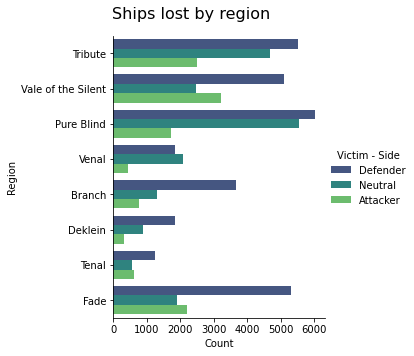

In [18]:
plt.figure(figsize=(17.5,10))
p=sns.catplot(data=new_kill_df,y='regionName',kind='count',orient='h',palette='viridis',hue='Victim - Side')
p.set_axis_labels("Count", "Region")
#p.set_titles("Ships Lost by Region by Side")
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle('Ships lost by region', fontsize=16)
plt.savefig("By Region.png",bbox_inches="tight")

In [19]:
#creating a pivot for losses by side over time 

by_region_pivot_df=pd.pivot_table(new_kill_df,index='Kill Date',values='victimCorp',columns='regionName',aggfunc='count')
#doesn't really matter what the values are, this is just what you're using to get a count
#it is the columns parameter that is the most important

by_region_pivot_df

regionName,Branch,Deklein,Fade,Pure Blind,Tenal,Tribute,Vale of the Silent,Venal
Kill Date,,,,,,,,
2016-03-01,110,78,126,254,22,122,226,74
2016-03-02,77,57,194,276,10,42,121,107
2016-03-03,45,59,96,318,20,88,121,119
2016-03-04,46,70,270,350,12,98,144,98
2016-03-05,83,60,172,615,48,156,143,176
2016-03-06,98,78,243,404,35,157,420,129
2016-03-07,79,71,123,227,28,183,168,87
2016-03-08,76,72,194,235,18,77,166,83
2016-03-09,58,67,81,209,23,60,109,230


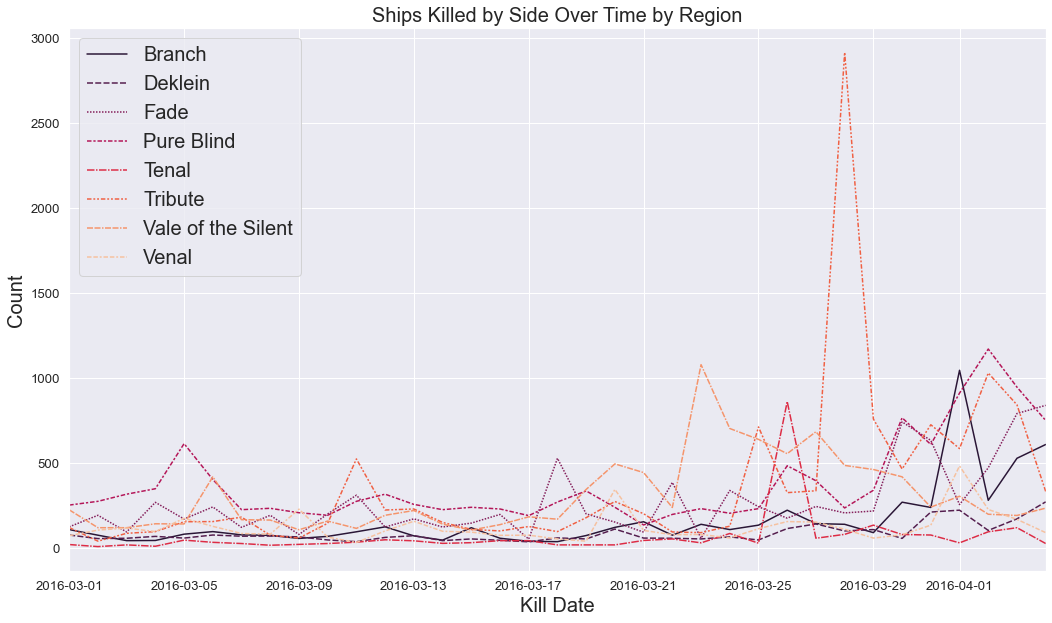

In [20]:
#line plot

plt.figure(figsize=(17.5,10))
sns.set(font_scale = 1.2)
p = sns.lineplot(data = by_region_pivot_df,palette="rocket")
p.set_xlabel("Kill Date", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
p.set_title("Ships Killed by Side Over Time by Region", fontsize = 20)
p.set_xlim([datetime.date(2016, 3, 1), datetime.date(2016, 4, 4)])
plt.legend( fontsize = 20);

In [21]:
#creating a pivot for losses by side over time 

victim_pivot_df=pd.pivot_table(new_kill_df,index='Kill Date',values='victimCorp',columns='Victim - Side',aggfunc='count')
#doesn't really matter what the values are, this is just what you're using to get a count
#it is the columns parameter that is the most important

victim_pivot_df

Victim - Side,Attacker,Defender,Neutral
Kill Date,,,
2016-03-01,197,465,350
2016-03-02,117,390,377
2016-03-03,76,497,293
2016-03-04,185,524,379
2016-03-05,167,637,649
2016-03-06,182,749,633
2016-03-07,87,474,405
2016-03-08,120,486,315
2016-03-09,61,463,313


In [22]:
'''below uses the relplot however i don't find it as changeable as the lineplot below. Therefore have abandoned 
this in favour of line plot'''

# sns.set_context('poster')
# _=sns.relplot(data=victim_pivot_df, kind='line',height=10,aspect=1.75)
# _.set(ylabel="Count")


"below uses the relplot however i don't find it as changeable as the lineplot below. Therefore have abandoned \nthis in favour of line plot"

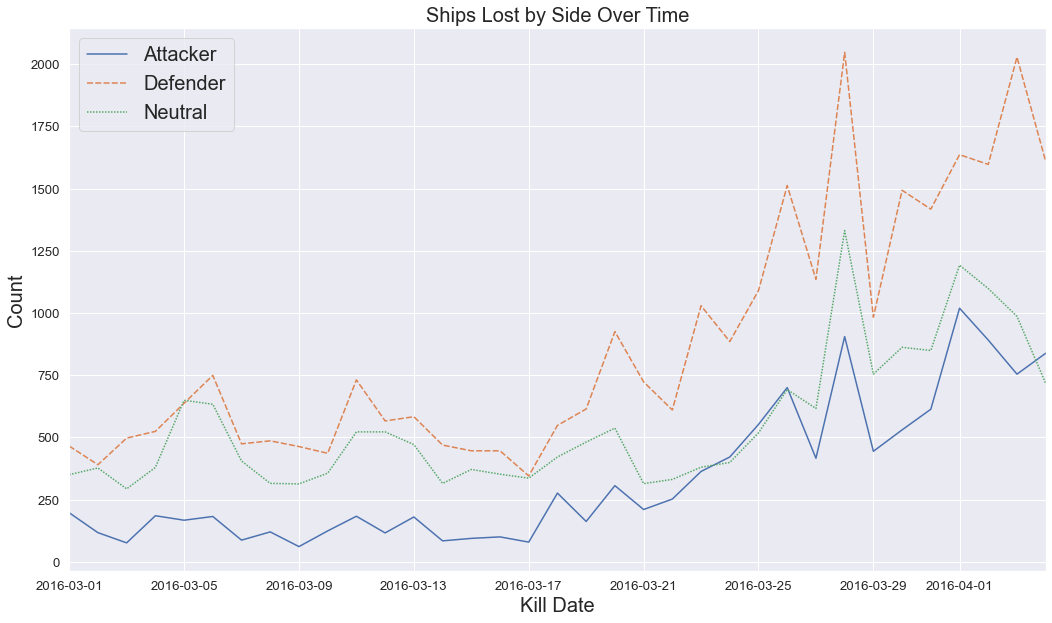

In [23]:
#line plot

plt.figure(figsize=(17.5,10))
sns.set(font_scale = 1.2)
p = sns.lineplot(data = victim_pivot_df)
p.set_xlabel("Kill Date", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
p.set_title("Ships Lost by Side Over Time", fontsize = 20)
p.set_xlim([datetime.date(2016, 3, 1), datetime.date(2016, 4, 4)])
plt.legend( fontsize = 20)
plt.savefig("Ships Lost.png")

In [24]:
#creating a pivot for kills by side over time 

killed_by_pivot_df=pd.pivot_table(new_kill_df,index='Kill Date',values='victimCorp',columns='Killed By - Side',aggfunc='count')
#doesn't really matter what the values are, this is just what you're using to get a count
#it is the columns parameter that is the most important

killed_by_pivot_df

Killed By - Side,Attacker,Defender,Neutral
Kill Date,,,
2016-03-01,210,366,436
2016-03-02,107,369,408
2016-03-03,139,265,462
2016-03-04,174,443,471
2016-03-05,158,535,760
2016-03-06,297,575,692
2016-03-07,96,339,531
2016-03-08,132,321,468
2016-03-09,122,312,403


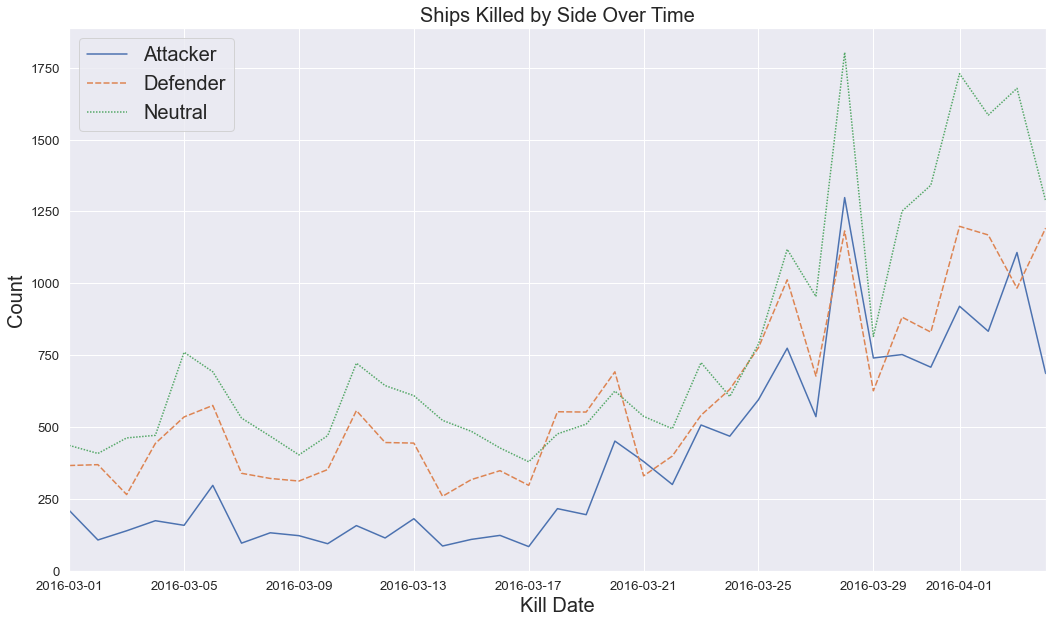

In [25]:
#line plot

plt.figure(figsize=(17.5,10))
sns.set(font_scale = 1.2)
p = sns.lineplot(data = killed_by_pivot_df)
p.set_xlabel("Kill Date", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
p.set_title("Ships Killed by Side Over Time", fontsize = 20)
p.set_xlim([datetime.date(2016, 3, 1), datetime.date(2016, 4, 4)])
plt.legend( fontsize = 20)
plt.savefig("Ships Killed");

In [26]:
#creating a pivot for 
versus_pivot_df=pd.pivot_table(new_kill_df,index='Victim - Side',values='victimCorp',columns='Killed By - Side',aggfunc='count')
#doesn't really matter what the values are, this is just what you're using to get a count
#it is the columns parameter that is the most important

versus_pivot_df

Killed By - Side,Attacker,Defender,Neutral
Victim - Side,,,
Attacker,1423,7476,2905
Defender,9516,2368,18704
Neutral,2910,10925,5602


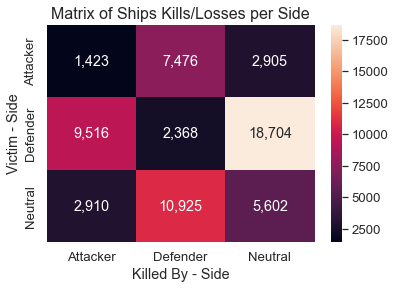

In [27]:
plt.figure()
p=sns.heatmap(versus_pivot_df,annot=True,fmt=",")
p.set_title("Matrix of Ships Kills/Losses per Side", fontsize = 16)
plt.savefig("Matrix of ship kills.png")

<Figure size 1260x720 with 0 Axes>

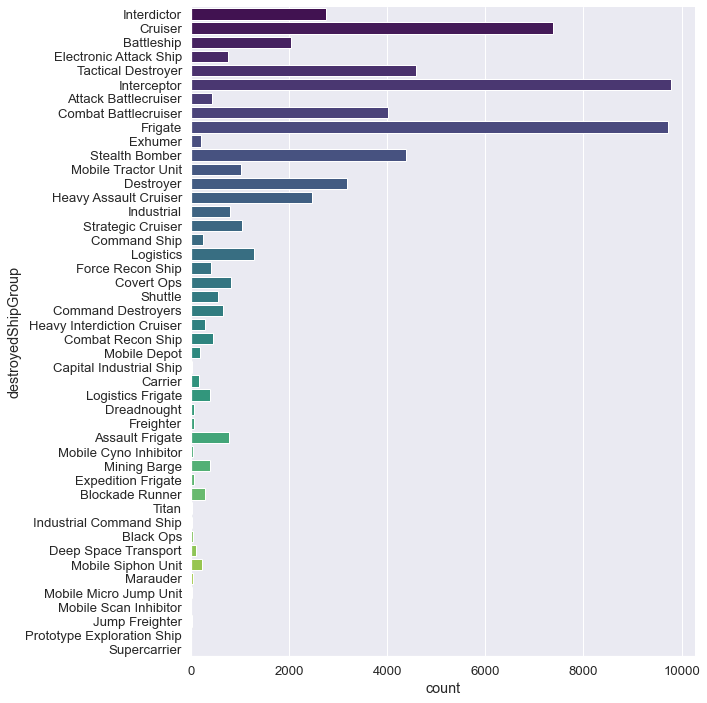

In [28]:
#kills by ship type
plt.figure(figsize=(17.5,10))
p=sns.catplot(data=new_kill_df,y='destroyedShipGroup',kind='count',orient='h',palette='viridis',height=10,aspect=1)

In [29]:
"""MOVED THIS TO THE TOP"""

#removing capsules and rookie ships

#filtering for just the imperium held regions

#new_kill_df=new_kill_df[~new_kill_df.destroyedShipGroup.isin(["Rookie ship","Capsule"])] #the ~ means changes it to a not in

'MOVED THIS TO THE TOP'

In [30]:
#getting the count plot order

count_plot_order=new_kill_df.groupby("destroyedShipGroup")['victimCorp'].count().sort_values(ascending=False).index.values

#count_plot_order

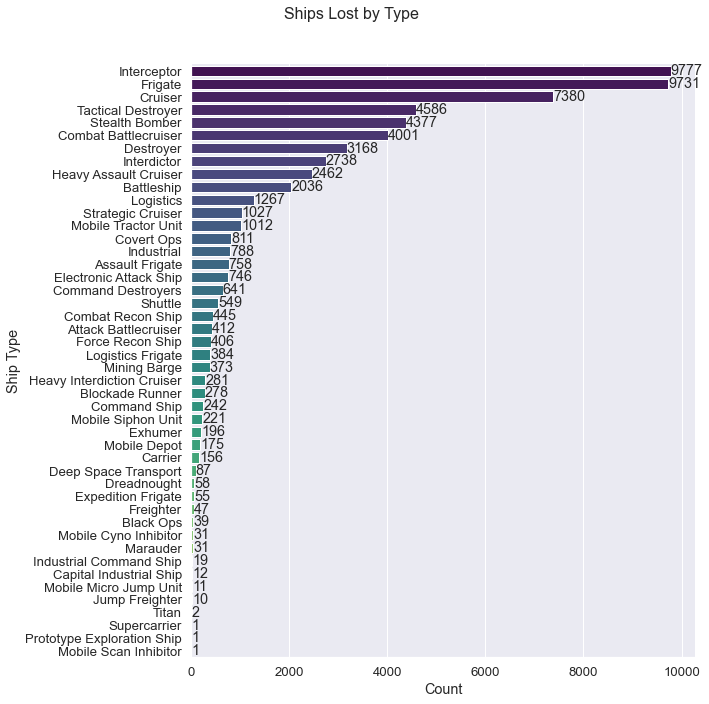

In [31]:
#kills by count of ship type

g=sns.catplot(data=new_kill_df,y='destroyedShipGroup',kind='count',orient='h',palette='viridis',height=10,aspect=1,order=count_plot_order)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [(v.get_width() ) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
g.set_axis_labels("Count", "Ship Type")
#p.set_titles("Ships Lost by Region by Side")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ships Lost by Type', fontsize=16)
plt.savefig("Ships lost by type");

In [32]:
#getting the sum plot order

sum_plot_order=new_kill_df.groupby("destroyedShipGroup")['iskLost'].sum().sort_values(ascending=False).index.values

#sum_plot_order

In [33]:
# _=new_kill_df.groupby("destroyedShipGroup")['iskLost'].sum().sort_values(ascending=False)
# _

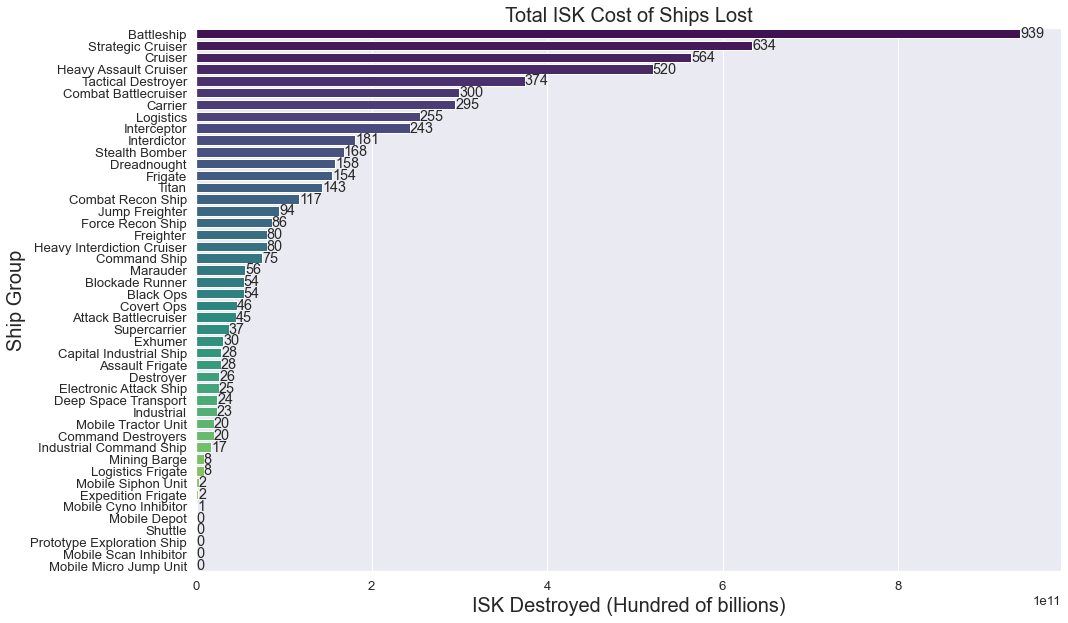

In [85]:
#kills by count of ship type
plt.figure(figsize=(15.5,10))
#p=sns.catplot(data=new_kill_df,x='iskLost',y='destroyedShipGroup',kind='bar',orient='h',palette='viridis',height=10,aspect=1,ci=None,order=sum_plot_order)
g=sns.barplot(data=new_kill_df,x='iskLost',y='destroyedShipGroup',orient='h',order=sum_plot_order,ci=None,estimator=sum,palette='viridis')

rects = g.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2 #puts it mid-way up the vertical axis of each bar

    # Number of points between bar and label. Change to your liking.
    space = 0
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

     # Use X value as label and format number with one decimal place
    label = "{:,.0f}".format(round((x_value/1000000000),1))

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        xy=(x_value, y_value),         # Place label at end of the bar
        
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
        
g.set_xlabel("ISK Destroyed (Hundred of billions)", fontsize = 20)
g.set_ylabel("Ship Group", fontsize = 20)
#plt.xticks([100000000000,200000000000,300000000000,400000000000,500000000000],['a','b','c','d','e'])
g.set_title("Total ISK Cost of Ships Lost", fontsize = 20)
plt.savefig("ISK lost by ship type.png")

In [90]:
#getting the average plot order

# average_plot_order=new_kill_df.groupby("destroyedShipGroup")['iskLost'].mean().sort_values(ascending=False).index.values

# average_plot_order

In [35]:
# import holoviews as hv

In [36]:
# plt.figure()
# sankey1 = hv.Sankey(new_kill_df, kdims=["Victim - Side", "destroyedShipGroup"], vdims=["iskLost"])
# plt.show()

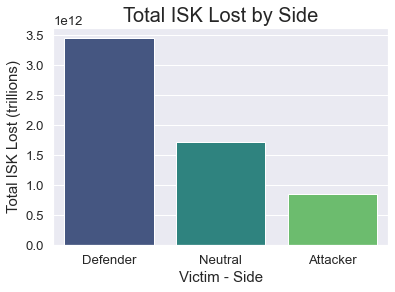

In [37]:
g=sns.barplot(data=new_kill_df,y='iskLost',x='Victim - Side',ci=None,estimator=sum,palette='viridis')

        
g.set_xlabel("Victim - Side", fontsize = 15)
g.set_ylabel("Total ISK Lost (trillions)", fontsize = 15)

g.set_title("Total ISK Lost by Side", fontsize = 20)
plt.savefig("Total ISK Lost by Side.png")

In [38]:
pie_data=new_kill_df.groupby("Victim - Side")['iskLost'].sum()
pie_data

Victim - Side
Attacker    8.530095e+11
Defender    3.446756e+12
Neutral     1.716477e+12
Name: iskLost, dtype: float64

In [84]:
x=new_kill_df['iskLost'].sum()
print(x)

6016242329619.23


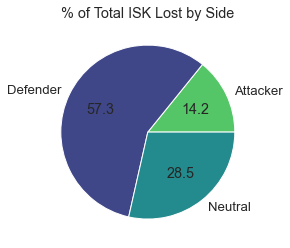

In [39]:
colors=['#55C667FF','#404788FF','#238A8DFF'] # attacker's colour, defender's colour, neutral's colour
                                        
    


p=pie_data.plot.pie(autopct="%.01f",colors=colors)
p.set_title("% of Total ISK Lost by Side")
p.set_ylabel('')
plt.savefig("Total ISK Lost pie chart.png")

# Converting ISK into PLEX and Real-Life Value

As of 10th April, 110 PLEX = £4.24.
Median price of PLEX = 3.15 million ISK.



In [40]:
pound_per_plex= round(4.24/110,2) #in pence
pound_per_plex

0.04

In [41]:
median_plex_price=3150000

new_kill_df['£s Lost']=(new_kill_df['iskLost']/median_plex_price)*pound_per_plex

In [42]:
new_kill_df

,victimCorp,victimAlliance,victimCoaltion,finalCorp,finalAlliance,finalCoalition,destroyedShipType,destroyedShipGroup,killTime,solarSystemName,regionName,iskLost,iskDestroyed,Victim - Side,Killed By - Side,Kill Date,£s Lost
6,Balkan Mafia,Circle-Of-Two,The Imperium,5.11,The Afterlife.,NaN,Sabre,Interdictor,2016-03-26 18:48:54,M-OEE8,Tribute,6.132547e+07,4.798891e+07,Defender,Neutral,2016-03-26,0.778736
10,Celestial Cartel,Circle-Of-Two,The Imperium,5.11,The Afterlife.,NaN,Phantasm,Cruiser,2016-03-16 19:13:16,M-OEE8,Tribute,1.501075e+08,1.299396e+08,Defender,Neutral,2016-03-16,1.906128
17,Burning Napalm,Northern Coalition.,NaN,5.11,The Afterlife.,NaN,Sabre,Interdictor,2016-03-23 21:29:27,2DWM-2,Vale of the Silent,1.028696e+08,7.534256e+07,Neutral,Neutral,2016-03-23,1.306280
19,Unholy Knights of Cthulhu,Test Alliance Please Ignore,Dank Meme Dominion,5.11,The Afterlife.,NaN,Armageddon,Battleship,2016-03-27 18:07:21,P3EN-E,Vale of the Silent,1.338350e+08,5.260854e+07,Attacker,Neutral,2016-03-27,1.699493
20,Guardians of Toutatis,Mordus Angels,NaN,5.11,The Afterlife.,NaN,Kitsune,Electronic Attack Ship,2016-03-14 19:32:29,5ZXX-K,Pure Blind,3.170421e+07,2.061788e+07,Neutral,Neutral,2016-03-14,0.402593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531933,Beyond Divinity Inc,Shadow Cartel,NaN,Zurabic,NaN,NaN,Bellicose,Cruiser,2016-03-24 20:33:31,M-OEE8,Tribute,2.772664e+07,1.442182e+07,Neutral,Neutral,2016-03-24,0.352084
531934,KarmaFleet,Goonswarm Federation,The Imperium,Zurabic,NaN,NaN,Sabre,Interdictor,2016-03-24 00:50:51,EC-P8R,Pure Blind,6.183250e+07,4.730489e+07,Defender,Neutral,2016-03-24,0.785175
531935,Imperial Guardians,The Aurora Shadow,NaN,Zurabic,NaN,NaN,Thrasher,Destroyer,2016-03-26 23:53:28,EC-P8R,Pure Blind,8.451306e+06,4.613112e+06,Neutral,Neutral,2016-03-26,0.107318
531938,Rabid Dogz Mining,The Bastion,The Imperium,Zutzlerz,Nemesis Enterprises.,NaN,Kestrel,Frigate,2016-03-27 21:17:16,8TPX-N,Vale of the Silent,5.950468e+06,3.107488e+06,Defender,Neutral,2016-03-27,0.075562


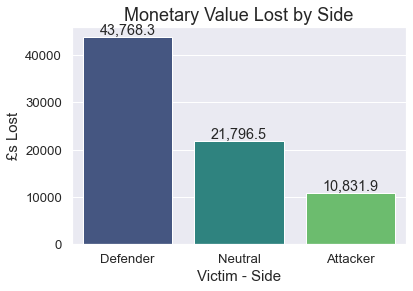

In [43]:
g=sns.barplot(data=new_kill_df,y='£s Lost',x='Victim - Side',ci=None,estimator=sum,palette='viridis')

ax=g.patches

#ADDING IN DATA LABELS

for rect in ax:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 0
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:,.1f}".format(y_value)

    # Create annotation
    g.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

        
g.set_xlabel("Victim - Side", fontsize = 15)
g.set_ylabel("£s Lost", fontsize = 15)

g.set_title("Monetary Value Lost by Side", fontsize = 18)
plt.savefig("Monetary Value by Side2.png",bbox_inches="tight")

In [44]:
money_pivot_df=pd.pivot_table(new_kill_df,index='Kill Date',values='£s Lost',aggfunc='sum')

money_pivot_df=money_pivot_df.reset_index()
money_pivot_df


,Kill Date,£s Lost
0,2016-03-01,2013.432586
1,2016-03-02,825.433692
2,2016-03-03,1081.189637
3,2016-03-04,1289.094439
4,2016-03-05,1406.100878
5,2016-03-06,1862.857363
6,2016-03-07,1048.781027
7,2016-03-08,926.300351
8,2016-03-09,1163.198089
9,2016-03-10,996.526226


In [45]:
_=money_pivot_df.columns.tolist()
_

['Kill Date', '£s Lost']

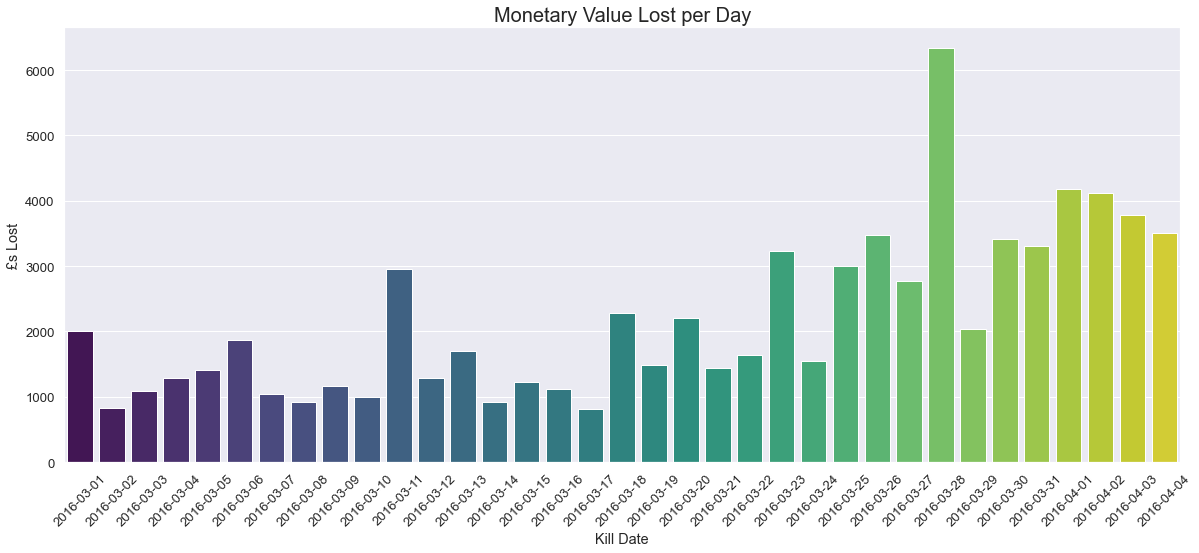

In [64]:
plt.figure(figsize=(20,8))
g=sns.barplot(data=money_pivot_df,x="Kill Date",y="£s Lost",ci=None,palette='viridis')
plt.xticks(rotation = 45)
g.set_title("Monetary Value Lost per Day", fontsize = 20)
plt.savefig("Monetary Value Lost per Day.png");


In [89]:
average_cost_order=new_kill_df.groupby("destroyedShipGroup")['£s Lost'].mean().sort_values(ascending=False).index.values

average_cost_order

array(['Titan', 'Supercarrier', 'Jump Freighter', 'Dreadnought',
       'Capital Industrial Ship', 'Carrier', 'Marauder', 'Freighter',
       'Black Ops', 'Industrial Command Ship', 'Strategic Cruiser',
       'Battleship', 'Command Ship', 'Heavy Interdiction Cruiser',
       'Deep Space Transport', 'Combat Recon Ship', 'Force Recon Ship',
       'Heavy Assault Cruiser', 'Logistics', 'Blockade Runner', 'Exhumer',
       'Attack Battlecruiser', 'Tactical Destroyer', 'Cruiser',
       'Combat Battlecruiser', 'Interdictor', 'Covert Ops',
       'Stealth Bomber', 'Expedition Frigate', 'Assault Frigate',
       'Electronic Attack Ship', 'Command Destroyers', 'Industrial',
       'Interceptor', 'Mining Barge', 'Logistics Frigate',
       'Prototype Exploration Ship', 'Mobile Tractor Unit',
       'Mobile Cyno Inhibitor', 'Frigate', 'Mobile Scan Inhibitor',
       'Mobile Siphon Unit', 'Destroyer', 'Mobile Depot',
       'Mobile Micro Jump Unit', 'Shuttle'], dtype=object)

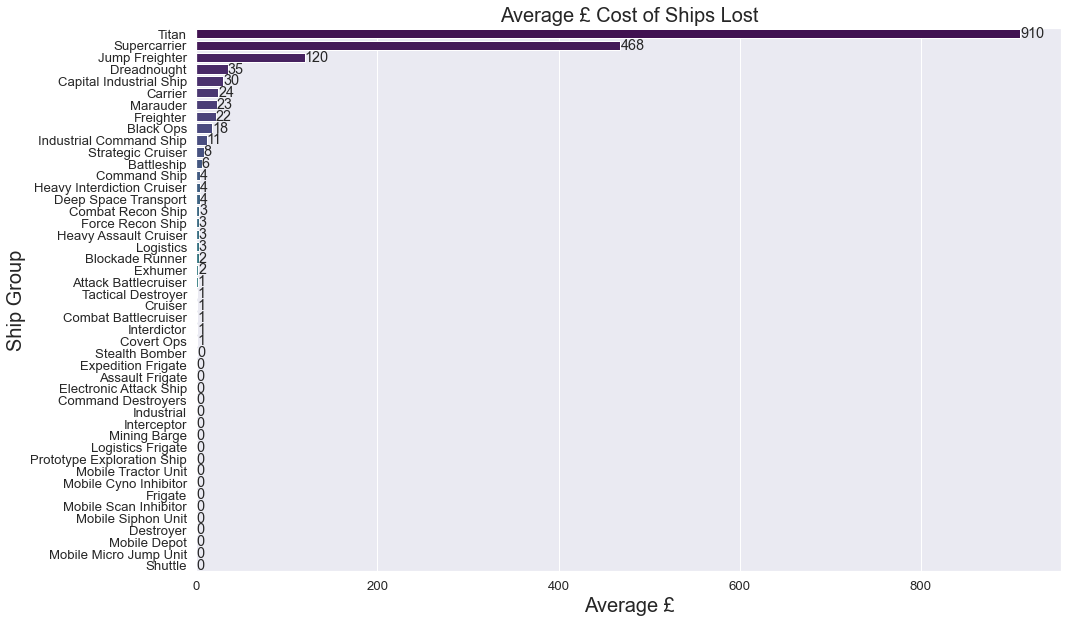

In [101]:
#kills by count of ship type
plt.figure(figsize=(15.5,10))
#p=sns.catplot(data=new_kill_df,x='iskLost',y='destroyedShipGroup',kind='bar',orient='h',palette='viridis',height=10,aspect=1,ci=None,order=sum_plot_order)
g=sns.barplot(data=new_kill_df,x='£s Lost',y='destroyedShipGroup',orient='h',order=average_cost_order,ci=None,palette='viridis')

rects = g.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2 #puts it mid-way up the vertical axis of each bar

    # Number of points between bar and label. Change to your liking.
    space = 0
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

     # Use X value as label and format number with one decimal place
    label = "{:,.0f}".format(round((x_value),1))

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        xy=(x_value, y_value),         # Place label at end of the bar
        
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
        
g.set_xlabel("Average £", fontsize = 20)
g.set_ylabel("Ship Group", fontsize = 20)
#plt.xticks([100000000000,200000000000,300000000000,400000000000,500000000000],['a','b','c','d','e'])
g.set_title("Average £ Cost of Ships Lost", fontsize = 20)
plt.savefig("Average £ Cost of Ships Lost.png",bbox_inches='tight')

# The Battle for M-OEE8

In [47]:
# mo_df=new_kill_df[(new_kill_df['solarSystemName']=="M-OEE8") & (new_kill_df['Kill Date']==datetime.date(2016,3,28))]
# mo_df

In [48]:
# sns.kdeplot(data=mo_df, x='iskLost',hue='Victim - Side')

In [49]:
# sns.displot(mo_df, x='iskLost',hue='Victim - Side')

# Returning Back to Overall Dataset

Think there's more to talk about for overall than focusing on M-OEE8.

In [50]:
bs_df=new_kill_df[(new_kill_df['destroyedShipGroup']=="Battleship")]

bs_df

,victimCorp,victimAlliance,victimCoaltion,finalCorp,finalAlliance,finalCoalition,destroyedShipType,destroyedShipGroup,killTime,solarSystemName,regionName,iskLost,iskDestroyed,Victim - Side,Killed By - Side,Kill Date,£s Lost
19,Unholy Knights of Cthulhu,Test Alliance Please Ignore,Dank Meme Dominion,5.11,The Afterlife.,NaN,Armageddon,Battleship,2016-03-27 18:07:21,P3EN-E,Vale of the Silent,1.338350e+08,5.260854e+07,Attacker,Neutral,2016-03-27,1.699493
25,Pandemic Horde Inc.,Pandemic Horde,PanFam,5.11,The Afterlife.,NaN,Scorpion,Battleship,2016-03-28 20:33:16,M-OEE8,Tribute,1.705117e+08,3.548989e+07,Attacker,Neutral,2016-03-28,2.165228
258,Cloak and Daggers,Fidelas Constans,The Imperium,13,Enigma Project,NaN,Maelstrom,Battleship,2016-03-01 20:33:52,W-4FA9,Branch,3.102589e+08,1.415359e+08,Defender,Neutral,2016-03-01,3.939796
1327,Article IV,Circle-Of-Two,The Imperium,20th Legion,Northern Coalition.,NaN,Machariel,Battleship,2016-03-23 21:40:43,2DWM-2,Vale of the Silent,5.517773e+08,4.319889e+08,Defender,Neutral,2016-03-23,7.006695
1379,Zebra Corp,Goonswarm Federation,The Imperium,20th Legion,Northern Coalition.,NaN,Armageddon,Battleship,2016-03-22 02:16:52,E9KD-N,Fade,1.175378e+08,2.703020e+07,Defender,Neutral,2016-03-22,1.492544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530094,The Scope,NaN,NaN,ZERO T0LERANCE,RAZOR Alliance,The Imperium,Rokh,Battleship,2016-03-23 23:02:32,UQ9-3C,Branch,1.189669e+09,5.545282e+08,Neutral,Defender,2016-03-23,15.106903
530205,Pandemic Horde Inc.,Pandemic Horde,PanFam,ZERO T0LERANCE,RAZOR Alliance,The Imperium,Scorpion,Battleship,2016-03-28 21:20:45,J-GAMP,Tribute,1.726448e+08,3.306230e+07,Attacker,Defender,2016-03-28,2.192314
530223,Beyond Frontier,Brave Collective,NaN,ZERO T0LERANCE,RAZOR Alliance,The Imperium,Scorpion,Battleship,2016-03-28 21:17:07,J-GAMP,Tribute,1.768299e+08,4.262683e+07,Neutral,Defender,2016-03-28,2.245460
530427,Caldari Provisions,NaN,NaN,Zervas Aeronautics,The Bastion,The Imperium,Dominix,Battleship,2016-03-11 13:26:42,IPAY-2,Vale of the Silent,1.479385e+08,4.492264e+07,Neutral,Defender,2016-03-11,1.878584


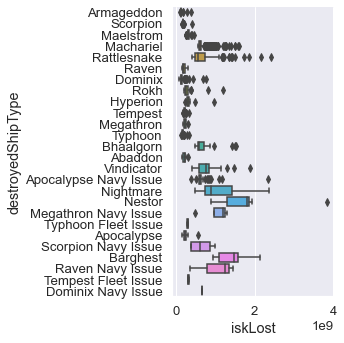

In [51]:
sns.catplot(data=bs_df, x='iskLost', y='destroyedShipType', kind='box')

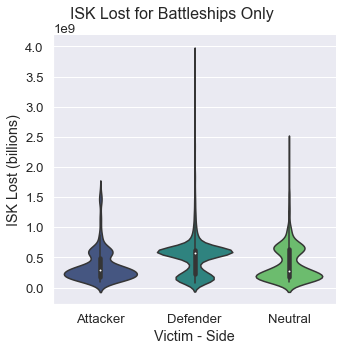

In [65]:
g=sns.catplot(data=bs_df, y='iskLost', x='Victim - Side', kind='violin',palette='viridis')


g.set_axis_labels("Victim - Side", "ISK Lost (billions)")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('ISK Lost for Battleships Only', fontsize=16)
plt.savefig("Battleship Violin Plot.png");

In [70]:
#getting count order for battleships

count_plot_order=bs_df.groupby("destroyedShipType")['victimCorp'].count().sort_values(ascending=False).index.values
count_plot_order

array(['Machariel', 'Rattlesnake', 'Dominix', 'Armageddon', 'Maelstrom',
       'Typhoon', 'Scorpion', 'Raven', 'Apocalypse Navy Issue',
       'Megathron', 'Tempest', 'Hyperion', 'Rokh', 'Bhaalgorn',
       'Vindicator', 'Abaddon', 'Nightmare', 'Apocalypse',
       'Scorpion Navy Issue', 'Nestor', 'Barghest',
       'Megathron Navy Issue', 'Raven Navy Issue', 'Typhoon Fleet Issue',
       'Tempest Fleet Issue', 'Dominix Navy Issue'], dtype=object)

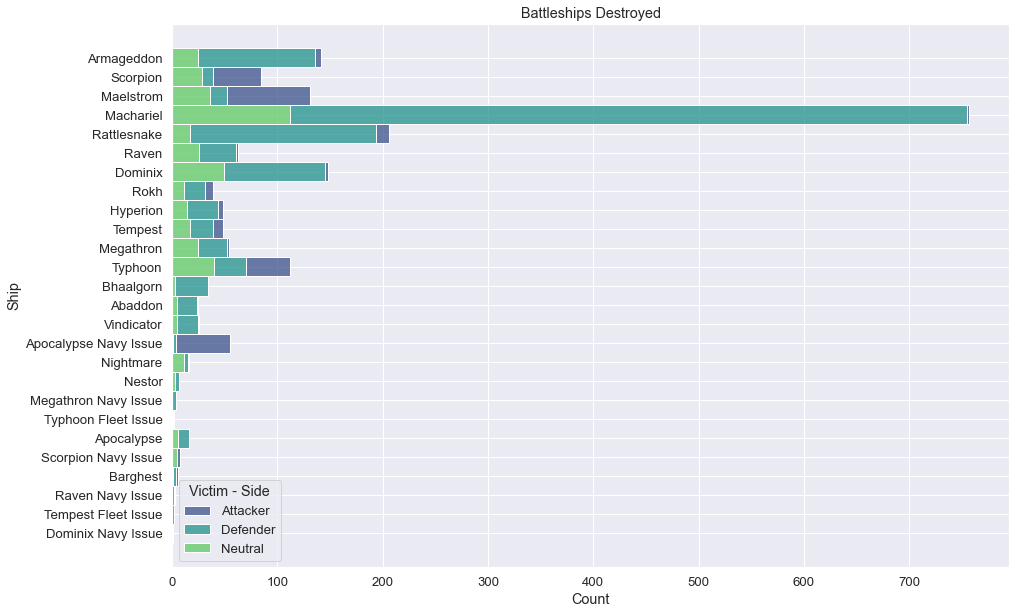

In [75]:
plt.figure(figsize=(15,10))
g=sns.histplot(bs_df, y='destroyedShipType',hue='Victim - Side',multiple='stack',palette='viridis')
#plt.legend(loc='lower right')

g.set_ylabel( "Ship")
g.set_title("Battleships Destroyed")
plt.savefig("Battleships by type.png",bbox_inches='tight')

Text(0.5, 1.0, 'Battleships Destroyed')

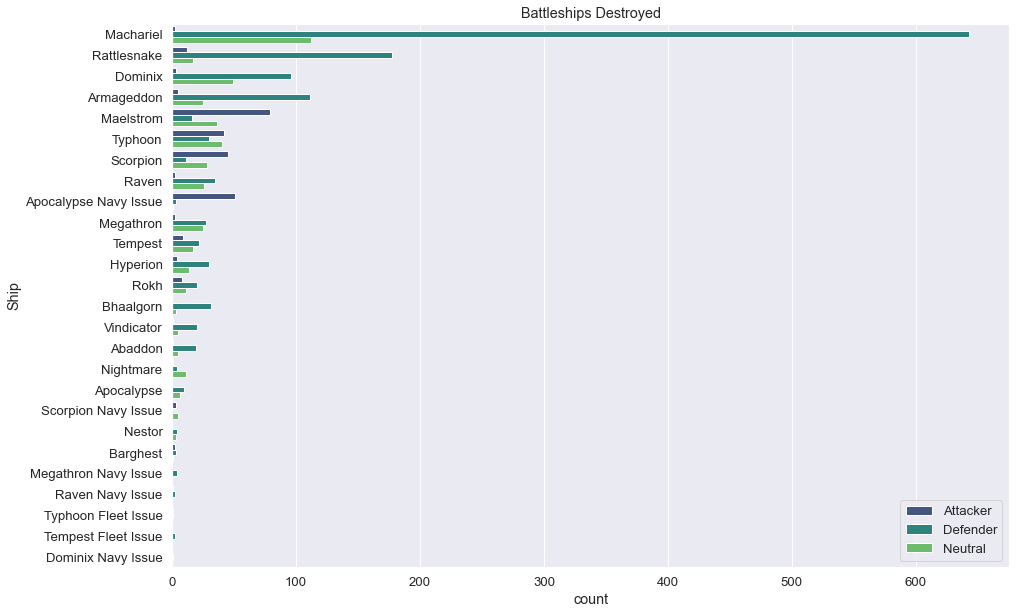

In [81]:
plt.figure(figsize=(15,10))
g=sns.countplot(data=bs_df, y='destroyedShipType',hue='Victim - Side',palette='viridis',order=count_plot_order)
plt.legend(loc='lower right')

g.set_ylabel( "Ship")
g.set_title("Battleships Destroyed")
# plt.savefig("Battleships by type.png",bbox_inches='tight')

In [54]:
new_kill_df.to_excel("new_kill_df.xlsx")